In [117]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import log_loss, f1_score, confusion_matrix
from src.mlp import MLP
from src.layer import Layer
from src.visualisation import plot
from sklearn.preprocessing import OneHotEncoder, StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Easy

In [101]:
df_training = pd.read_csv("data/mio1/classification/easy-training.csv")
df_test = pd.read_csv("data/mio1/classification/easy-test.csv")

x_train = df_training[['x', 'y']].values.T
y_train = df_training['c'].values.reshape(-1, 1)

x_test = df_test[['x', 'y']].values.T
y_test = df_test['c'].values.reshape(-1, 1)

enc = OneHotEncoder(sparse_output=False)
y_train_oh = enc.fit_transform(y_train).T
y_test_oh = enc.transform(y_test).T

standard_scaler = StandardScaler()
x_train_normalised = standard_scaler.fit_transform(x_train.T).T
x_test_normalised = standard_scaler.transform(x_test.T).T

In [102]:
model = MLP(layers=[
    Layer(2, 2, activation_name="softmax"),
])

In [103]:
loss = model.fit(x_train_normalised, y_train_oh, learning_rate=0.001, epochs=2_000, verbose=1, batch_size=25, loss_function="log_loss")

epoch: 500/2000	loss: 0.08182337860868173
epoch: 1000/2000	loss: 0.05353523462250994
epoch: 1500/2000	loss: 0.04324096119026157
epoch: 2000/2000	loss: 0.03764301586641615
done! final loss: 0.03764301586641615


In [115]:
y_predicted = model.predict(x_test_normalised)
y_predicted_class = enc.inverse_transform(y_predicted.T)

<Axes: >

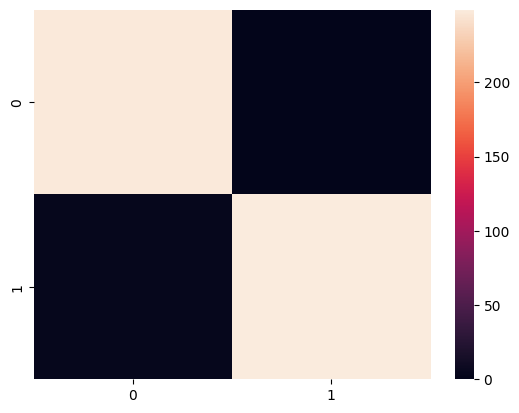

In [120]:
sns.heatmap(confusion_matrix(y_test, y_predicted_class))
f1_score(y_test, y_predicted_class)

### xor3

In [225]:
df_training = pd.read_csv("data/mio1/classification/xor3-training.csv")
df_test = pd.read_csv("data/mio1/classification/xor3-test.csv")

x_train = df_training[['x', 'y']].values.T
y_train = df_training['c'].values.reshape(-1, 1)

x_test = df_test[['x', 'y']].values.T
y_test = df_test['c'].values.reshape(-1, 1)

enc = OneHotEncoder(sparse_output=False)
y_train_oh = enc.fit_transform(y_train).T
y_test_oh = enc.transform(y_test).T

standard_scaler = StandardScaler()
x_train_normalised = standard_scaler.fit_transform(x_train.T).T
x_test_normalised = standard_scaler.transform(x_test.T).T

In [227]:
model = MLP(layers=[
    Layer(2, 20, activation_name="sigmoid"),
    Layer(20, 20, activation_name="sigmoid"),
    Layer(20, 2, activation_name="softmax")
])

In [228]:
loss = model.fit(x_train_normalised, y_train_oh, learning_rate=0.001, epochs=4_000, verbose=1, batch_size=50, loss_function="log_loss")

epoch: 500/4000	loss: 0.36889455215921463
epoch: 1000/4000	loss: 0.12476220974571672
epoch: 1500/4000	loss: 0.08234817714607996
epoch: 2000/4000	loss: 0.06149691347994942
epoch: 2500/4000	loss: 0.04676155208688191
epoch: 3000/4000	loss: 0.035652217440724665
epoch: 3500/4000	loss: 0.027514470544647972
epoch: 4000/4000	loss: 0.021181849084103355
done! final loss: 0.021181849084103355


<Axes: >

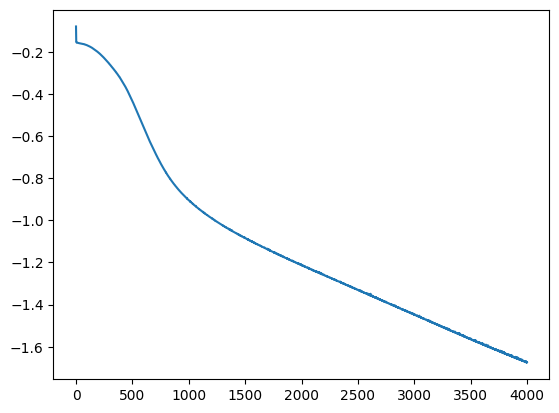

In [229]:
sns.lineplot(np.log10(loss))

In [230]:
y_predicted = model.predict(x_test_normalised)
y_predicted_class = enc.inverse_transform(y_predicted.T)

F1-score: 0.9327146171693735


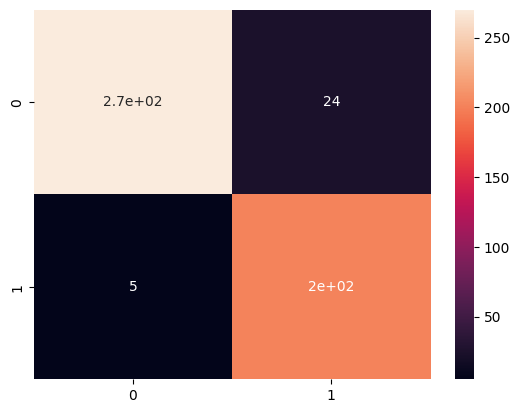

In [231]:
sns.heatmap(confusion_matrix(y_test, y_predicted_class), annot=True)
print(f"F1-score: {f1_score(y_test, y_predicted_class)}")

### Rings3

In [204]:
df_training = pd.read_csv("data/mio1/classification/rings3-regular-training.csv")
df_test = pd.read_csv("data/mio1/classification/rings3-regular-test.csv")

x_train = df_training[['x', 'y']].values.T
y_train = df_training['c'].values.reshape(-1, 1)

x_test = df_test[['x', 'y']].values.T
y_test = df_test['c'].values.reshape(-1, 1)

enc = OneHotEncoder(sparse_output=False)
y_train_oh = enc.fit_transform(y_train).T
y_test_oh = enc.transform(y_test).T

standard_scaler = StandardScaler()
x_train_normalised = standard_scaler.fit_transform(x_train.T).T
x_test_normalised = standard_scaler.transform(x_test.T).T

In [219]:
model = MLP(layers=[
    Layer(2, 4, activation_name="sigmoid"),
    Layer(4, 4, activation_name="sigmoid"),
    Layer(4, 3, activation_name="softmax")
])

In [ ]:
loss = model.fit(x_train_normalised, y_train_oh, learning_rate=0.002, epochs=4_000, verbose=1, batch_size=50, loss_function="log_loss")

<Axes: >

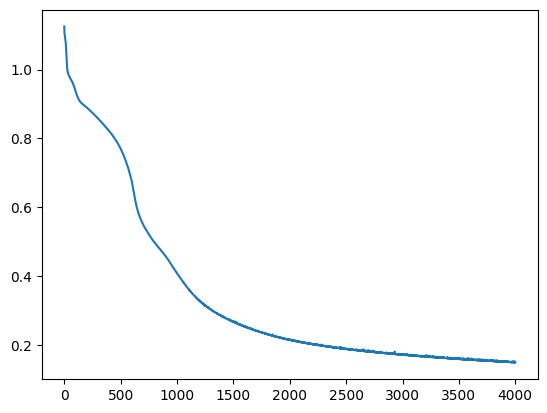

In [221]:
sns.lineplot(loss)

In [222]:
y_predicted = model.predict(x_test_normalised)
y_predicted_class = enc.inverse_transform(y_predicted.T)

F1-score: 0.9415


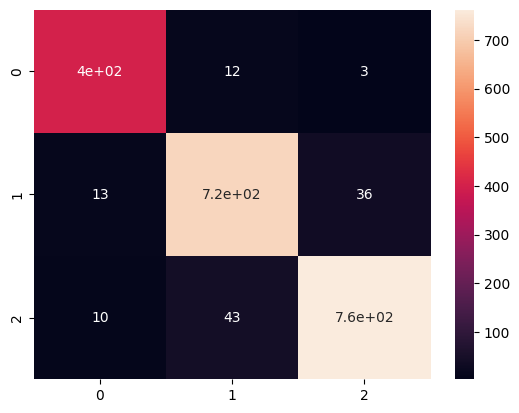

In [223]:
sns.heatmap(confusion_matrix(y_test, y_predicted_class), annot=True)
print(f"F1-score: {f1_score(y_test, y_predicted_class, average='micro')}")

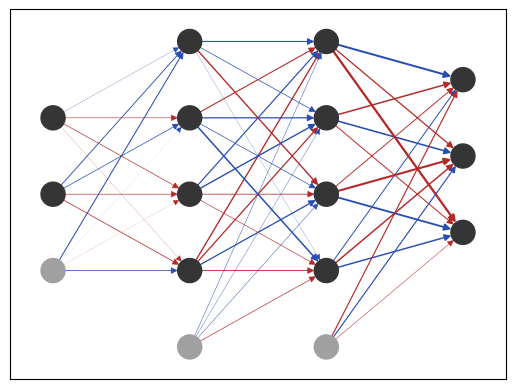

In [224]:
plot(model, log_weights=True)